In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing_cleaned.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,avg_rooms_per_hh,avg_bedrooms_per_hh,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,near bay,6.984127,1.023810,452600.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,near bay,8.288136,1.073446,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,near bay,5.817352,1.073059,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,near bay,6.281853,1.081081,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,near bay,4.761658,1.103627,269700.0


In [3]:
# get summary of data

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,avg_rooms_per_hh,avg_bedrooms_per_hh,median_house_value
count,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000,16079.000000
mean,-119.565153,35.653273,28.174140,2812.684184,585.095715,1504.176068,532.761552,3.730367,5.494061,1.135164,204942.910940
std,2.012152,2.156342,12.751387,2336.696736,449.784983,1206.852349,409.068915,1.844916,2.724052,0.528457,116414.766371
min,-124.350000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,1.000000,1.000000,14999.000000
25%,-121.780000,33.940000,18.000000,1540.500000,323.000000,823.000000,295.000000,2.485850,4.443662,1.034116,116450.000000
50%,-118.490000,34.270000,28.000000,2250.000000,474.000000,1222.000000,434.000000,3.375000,5.244300,1.067416,177100.000000
75%,-118.010000,37.740000,37.000000,3319.500000,702.000000,1817.000000,643.000000,4.546900,6.094575,1.116887,262500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,34.066667,500001.000000


In [4]:
# sort between categorical and numerical features

num_vars = df.drop(columns='ocean_proximity', axis=1).columns

longitude


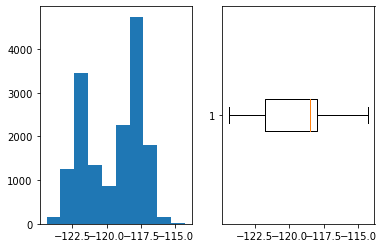

latitude


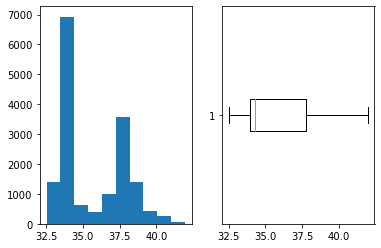

housing_median_age


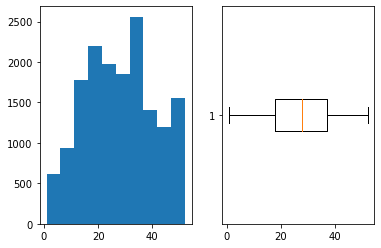

total_rooms


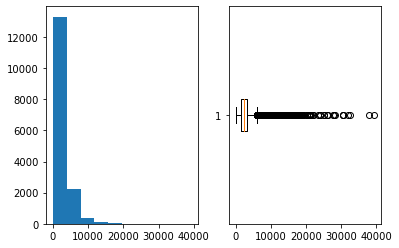

total_bedrooms


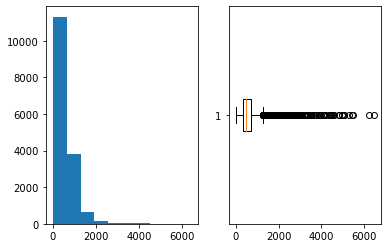

population


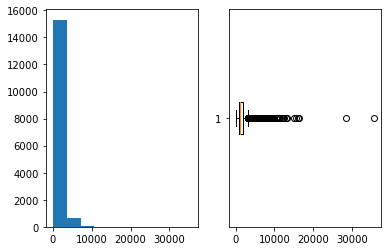

households


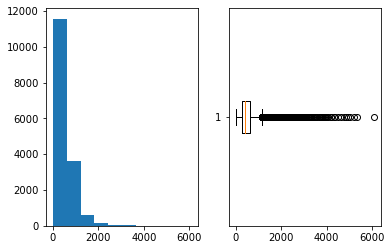

median_income


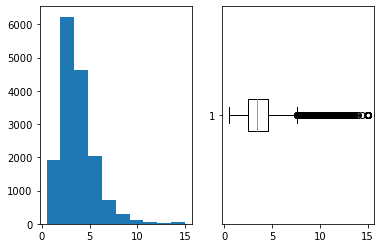

avg_rooms_per_hh


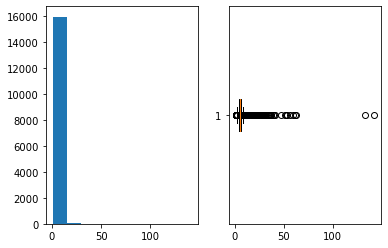

avg_bedrooms_per_hh


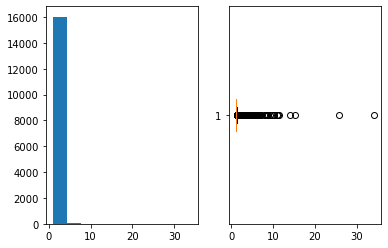

median_house_value


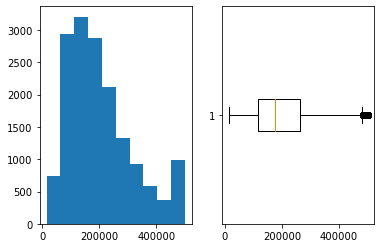

In [5]:
# univariate analysis on numerical features

for var in num_vars:
    print(var)
    plt.subplot(1, 2, 1)
    plt.hist(df[var])
    plt.subplot(1, 2, 2)
    plt.boxplot(df[var], vert=False)
    plt.show()

ocean_proximity


<BarContainer object of 5 artists>

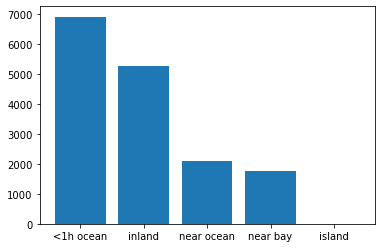

In [6]:
# univariate analysis on categorical feature

print('ocean_proximity')
plt.bar(df['ocean_proximity'].value_counts().index, df['ocean_proximity'].value_counts())

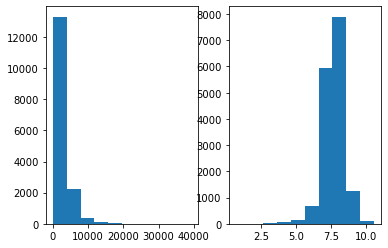

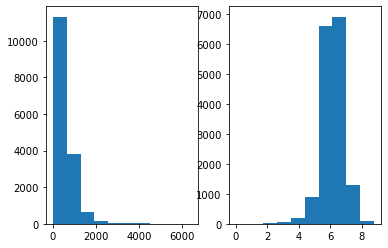

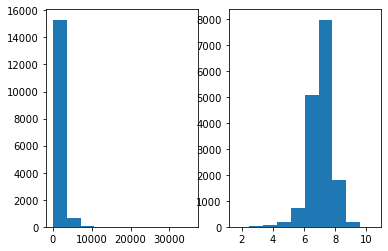

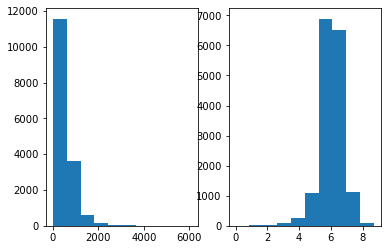

In [7]:
# apply log transformation to right skewed distributions

from scipy.stats import boxcox

for var in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    data = boxcox(df[var], 0)
    plt.subplot(1, 2, 1)
    plt.hist(df[var])
    plt.subplot(1, 2, 2)
    plt.hist(data)
    plt.show()
    df[var] = data

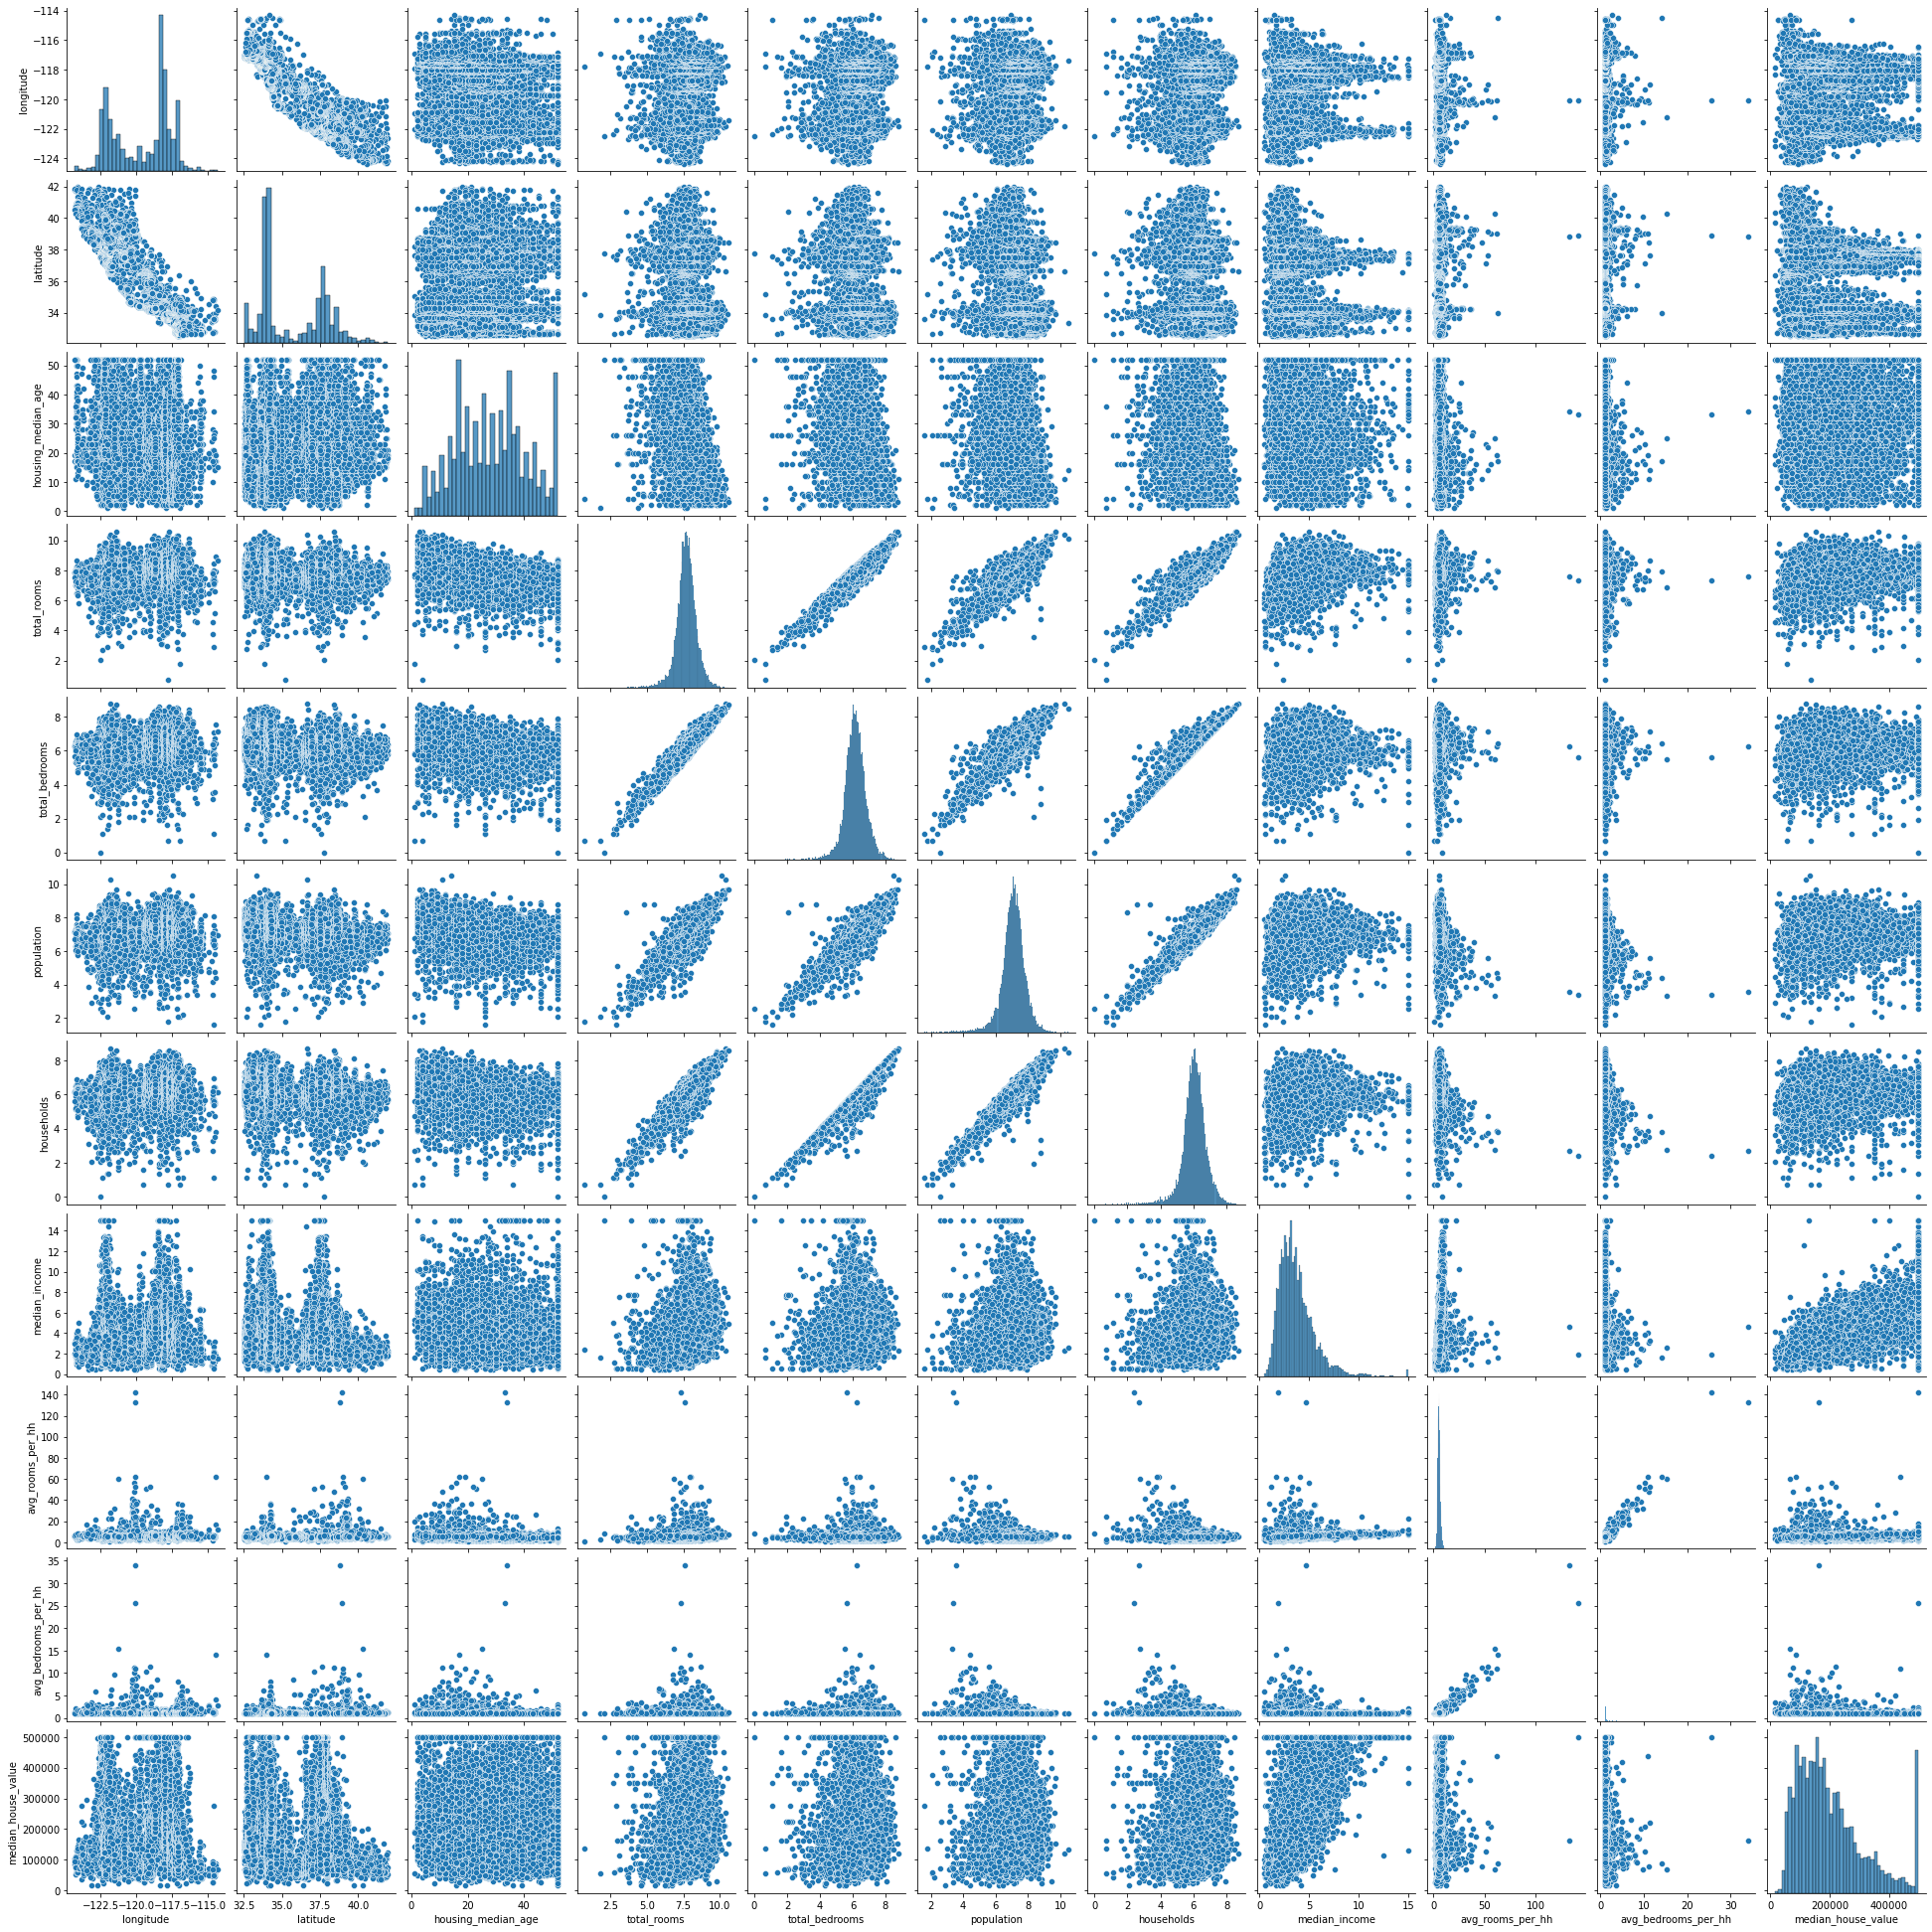

In [8]:
# bivariate analyses on numerical features

sns.pairplot(df)

<AxesSubplot:xlabel='ocean_proximity'>

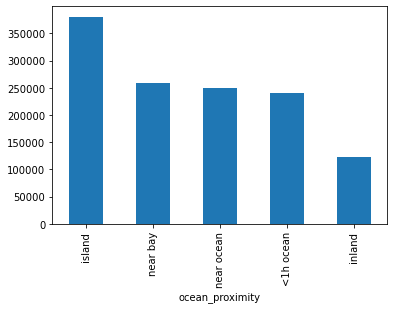

In [9]:
# comparing ocean_proximity vs. median_house_value

df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

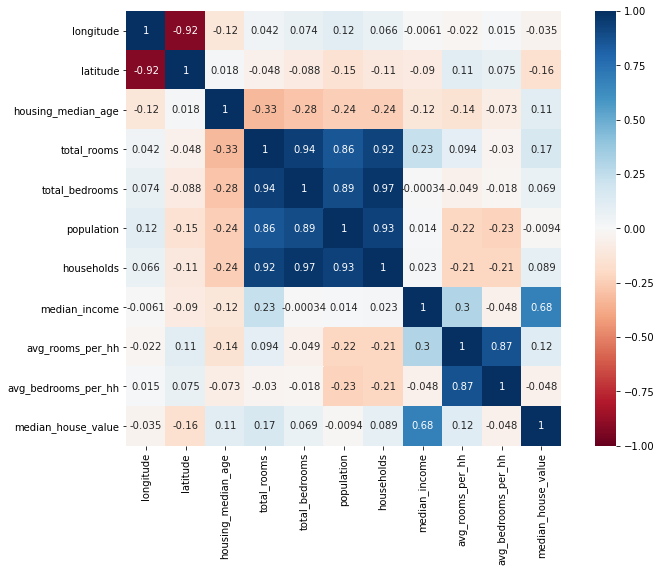

In [10]:
# correlation table of data

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu', square=True)

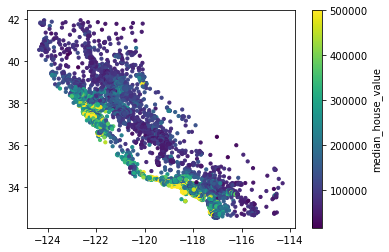

In [11]:
# median_house_value relative to location

plt.scatter(df['longitude'], df['latitude'], s=10, c=df['median_house_value'])
plt.colorbar(label='median_house_value')

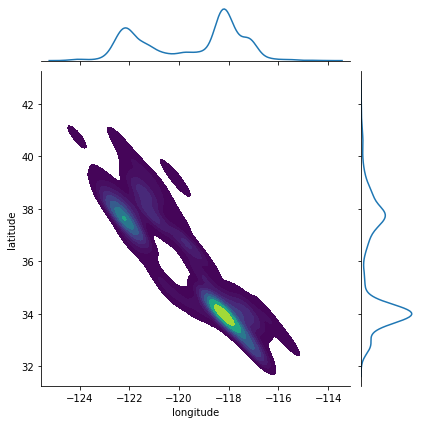

In [12]:
# density of data relative to location

sns.jointplot(x=df['longitude'], y=df['latitude'], cmap='viridis', kind='kde', shade=True)